In [1]:
# Importamos las librerías básicas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargamos el dataset iris que viene incluido con seaborn
df = sns.load_dataset('iris')

# Mostramos las primeras filas del dataset
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
# Tamaño del dataset (filas, columnas)
print("Dimensiones del dataset:", df.shape)

# Tipos de datos y valores nulos
print("\nInformación general:")
print(df.info())


Dimensiones del dataset: (150, 5)

Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [3]:
# Estadísticas descriptivas
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
# Conteo de cada especie
df['species'].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


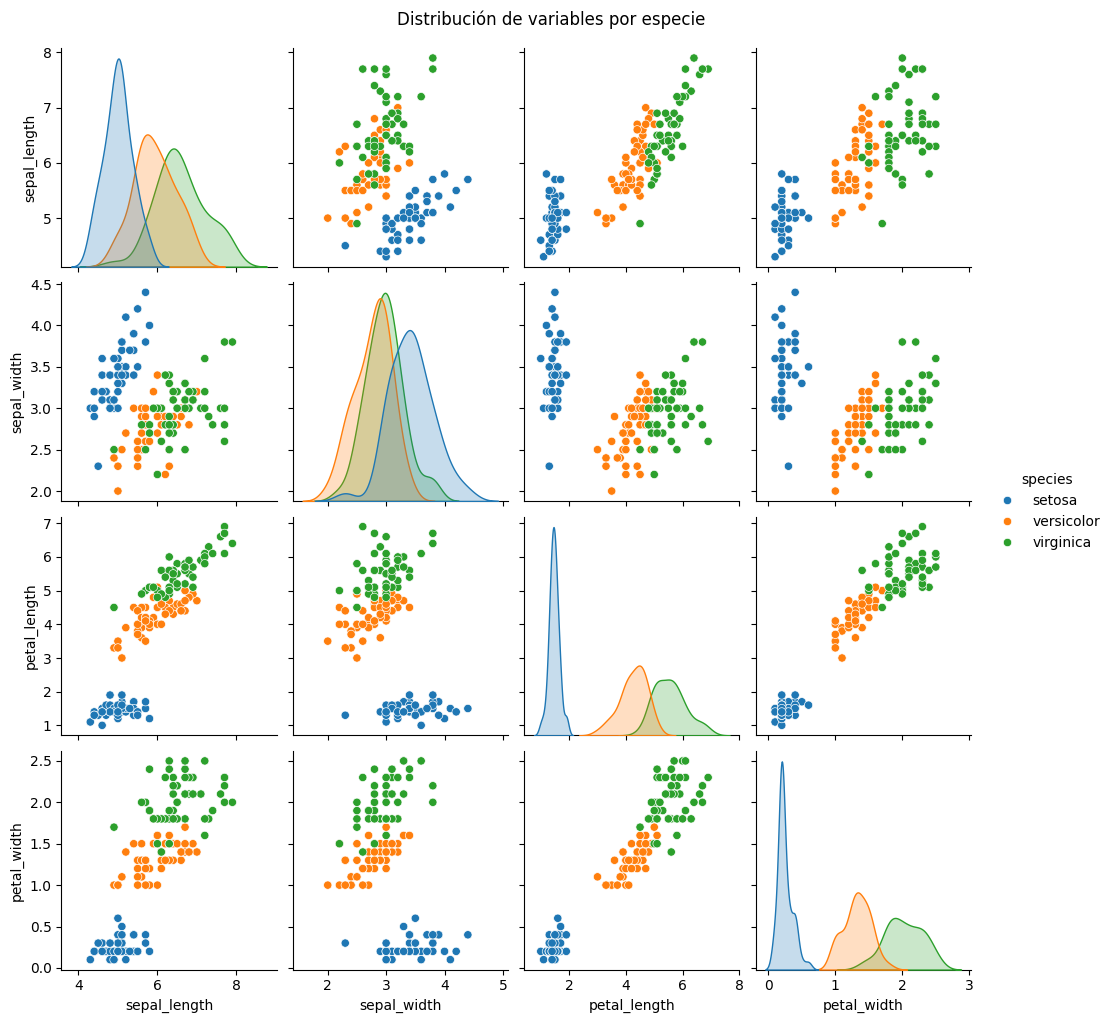

In [5]:
# Histograma por especie
sns.pairplot(df, hue='species')
plt.suptitle("Distribución de variables por especie", y=1.02)
plt.show()

In [6]:
# Variables predictoras (features)
X = df.drop('species', axis=1)

# Variable objetivo (target)
y = df['species']


In [7]:
from sklearn.preprocessing import LabelEncoder

# Codificamos las especies como números: setosa=0, versicolor=1, virginica=2
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Mostramos la conversión
dict(zip(le.classes_, le.transform(le.classes_)))


{'setosa': np.int64(0), 'versicolor': np.int64(1), 'virginica': np.int64(2)}

In [8]:
from sklearn.model_selection import train_test_split

# Dividimos los datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


In [9]:
from sklearn.linear_model import LogisticRegression

# Creamos el modelo
model = LogisticRegression(max_iter=200)

# Entrenamos el modelo
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [10]:
# Hacemos predicciones sobre los datos de prueba
y_pred = model.predict(X_test)


Precisión del modelo: 0.9666666666666667

Reporte de clasificación:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



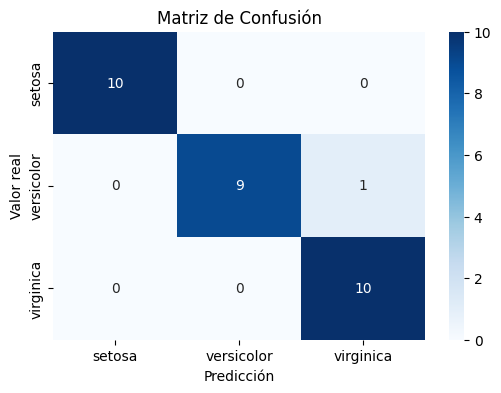

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Exactitud (accuracy)
print("Precisión del modelo:", accuracy_score(y_test, y_pred))

# Reporte detallado
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_, fmt='d')
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de Confusión")
plt.show()


**Crear una interfaz básica para la predicción**

In [12]:
def predecir_especie(sepal_length, sepal_width, petal_length, petal_width):
    # Creamos un dataframe con los datos ingresados
    datos_nuevos = pd.DataFrame({
        'sepal_length': [sepal_length],
        'sepal_width': [sepal_width],
        'petal_length': [petal_length],
        'petal_width': [petal_width]
    })

    # Hacemos la predicción
    prediccion = model.predict(datos_nuevos)

    # Convertimos la predicción a nombre de la especie
    especie_predicha = le.inverse_transform(prediccion)[0]

    return especie_predicha


In [13]:
# Ingresamos los valores manualmente
sepal_length = float(input("Ingresa la longitud del sépalo (cm): "))
sepal_width = float(input("Ingresa el ancho del sépalo (cm): "))
petal_length = float(input("Ingresa la longitud del pétalo (cm): "))
petal_width = float(input("Ingresa el ancho del pétalo (cm): "))

# Llamamos a la función de predicción
especie = predecir_especie(sepal_length, sepal_width, petal_length, petal_width)

print(f"La especie predicha es: {especie}")


Ingresa la longitud del sépalo (cm): 4.3
Ingresa el ancho del sépalo (cm): 2.2
Ingresa la longitud del pétalo (cm): 4.6
Ingresa el ancho del pétalo (cm): 4.3
La especie predicha es: virginica
